### Set Parameters

In [1]:
pf_id = 0 #problem formulation id; should match file name
n_scenarios = 5000 #should be run with 5000
#n_policies = 0 #doesn't work, ignore

### Run Model for Open Exploration

##### Define a nothing policy (necessary for the code to run)

In [2]:
# don't @ me it has to be set up this way to work
from ema_workbench import Policy
policies = [Policy('policy 0', **{'0_RfR 0':0,
                                  '0_RfR 1':0,
                                  '0_RfR 2':0,
                                  'A.1_DikeIncrease 0':0,
                                  'A.1_DikeIncrease 1':0,
                                  'A.1_DikeIncrease 2':0,
                                  '1_RfR 0':0,
                                  '1_RfR 1':0,
                                  '1_RfR 2':0,
                                  'A.2_DikeIncrease 0':0,
                                  'A.2_DikeIncrease 1':0,
                                  'A.2_DikeIncrease 2':0,
                                  '2_RfR 0':0,
                                  '2_RfR 1':0,
                                  '2_RfR 2':0,
                                  'A.3_DikeIncrease 0':0,
                                  'A.3_DikeIncrease 1':0,
                                  'A.3_DikeIncrease 2':0,
                                  '3_RfR 0':0,
                                  '3_RfR 1':0,
                                  '3_RfR 2':0,
                                  'A.4_DikeIncrease 0':0,
                                  'A.4_DikeIncrease 1':0,
                                  'A.4_DikeIncrease 2':0,
                                  '4_RfR 0':0,
                                  '4_RfR 1':0,
                                  '4_RfR 2':0,
                                  'A.5_DikeIncrease 0':0,
                                  'A.5_DikeIncrease 1':0,
                                  'A.5_DikeIncrease 2':0,
                                  'EWS_DaysToThreat':0
                                  })]

##### Import packages


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### Import things and set up model (with the selected problem formulation)


In [4]:
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation

ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(pf_id) #changes for each file

##### Define uncertainties and levers

In [5]:
import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

##### Run the model with the defined number of scenarios and the nothing policy

In [6]:
from ema_workbench import (ema_logging, MultiprocessingEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 5000 scenarios * 1 policies * 1 model(s) = 5000 experiments
100%|████████████████████████████████████| 5000/5000 [1:44:31<00:00,  1.25s/it]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


##### Define experiments and outcome; print names of the outcomes

In [7]:
experiments, outcomes = results
print(outcomes.keys())

dict_keys(['All Costs', 'Expected Number of Deaths'])


### Save Results

In [8]:
from ema_workbench import save_results

save_results(results, './output/open_exploration/Open_Exploration_id_%s.tar.gz'%pf_id)

[MainProcess/INFO] results saved successfully to /Users/morris/Desktop/EPA/1st Year Q4/EPA1361 Model-based decision-making/MBDM/final assignment/output/open_exploration/Open_Exploration_id_0.tar.gz


In [9]:
experiments.to_csv('./output/open_exploration/Open_Exploration_id_%s_exp.csv'%pf_id, index=False)
pd.DataFrame.from_dict(outcomes).to_csv('./output/open_exploration/Open_Exploration_id_%s_out.csv'%pf_id, index=False)

### Visualization

##### Load in previously saved results; can visualize without rerunning the whole notebook

In [10]:
from ema_workbench import load_results

results = load_results('./output/open_exploration/Open_Exploration_id_%s.tar.gz'%pf_id)
experiments, outcomes = results

[MainProcess/INFO] results loaded successfully from /Users/morris/Desktop/EPA/1st Year Q4/EPA1361 Model-based decision-making/MBDM/final assignment/output/open_exploration/Open_Exploration_id_0.tar.gz


##### Import stuff

In [11]:
from ema_workbench.analysis import prim, dimensional_stacking, feature_scoring

## Subspace Partitioning

#### Outcome: All Costs

##### Define x, y, and threshold

In [12]:
x = experiments
data = outcomes["All Costs"]
y = data <  np.percentile(data, 10) # 10 percent of worst outcomes

##### Tradeoff density and coverage

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 500 cases of interest
[MainProcess/INFO] mean: 0.9691119691119691, mass: 0.0518, coverage: 0.502, density: 0.9691119691119691 restricted_dimensions: 5


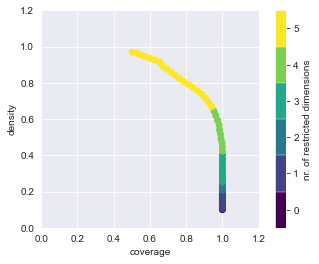

In [13]:
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()
box1.show_tradeoff()
plt.show()

##### Dimensional stacking

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


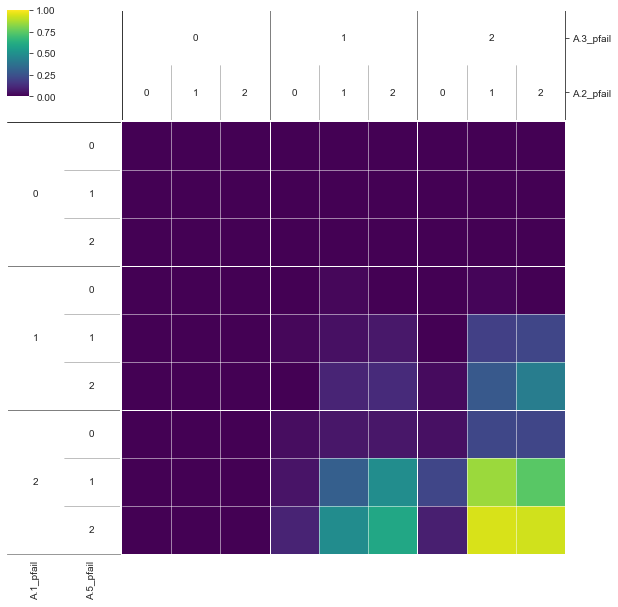

In [14]:
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3)
plt.show()

#### Outcome: Expected Number of Deaths

##### Define x, y, and threshold

In [15]:
x = experiments
data = outcomes["Expected Number of Deaths"]
y = data <  np.percentile(data, 10) # 10 percent of worst outcomes

##### Tradeoff density and coverage

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 500 cases of interest
[MainProcess/INFO] mean: 0.9, mass: 0.052, coverage: 0.468, density: 0.9 restricted_dimensions: 6


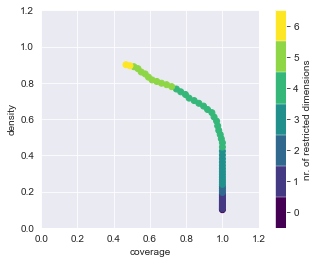

In [16]:
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()
box1.show_tradeoff()
plt.show()

##### Dimensional stacking


[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


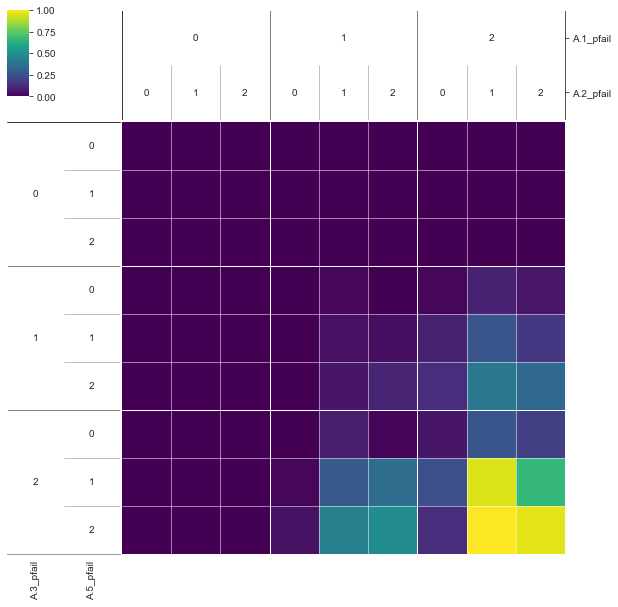

In [17]:
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3)
plt.show()

### Sensitivity Analysis

### Feature Scoring

/Users/morris/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/morris/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


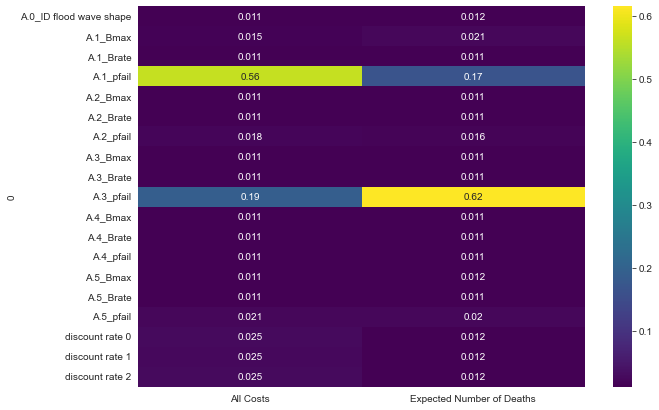

In [18]:
x = experiments.loc[:,['A.0_ID flood wave shape', 'A.1_pfail', 'A.2_pfail', 'A.3_pfail', 'A.4_pfail', 'A.5_pfail', 'A.1_Bmax', 'A.2_Bmax', 'A.3_Bmax', 'A.4_Bmax', 'A.5_Bmax',  'A.1_Brate', 'A.2_Brate', 'A.3_Brate', 'A.4_Brate', 'A.5_Brate', 'discount rate 0', 'discount rate 1', 'discount rate 2']]
y = outcomes

plt.figure(figsize = (10,7))

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True, )

plt.show()